importing the libraries to implement the function on no2 data set provided

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
upload the no2 data file present on the kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving NO2_data.csv to NO2_data.csv


In [ ]:
df = pd.read_csv("NO2_data.csv", encoding='latin1', low_memory=False)
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [ ]:
# selecting the no2 features from the dataset :
x = df["no2"]

# rmove missing values
x = x.dropna()

# remove non physical values
x = x[x >= 0]

x.describe()

,no2
count,419509.000000
mean,25.809623
std,18.503086
min,0.000000
25%,14.000000
50%,22.000000
75%,32.200000
max,876.000000


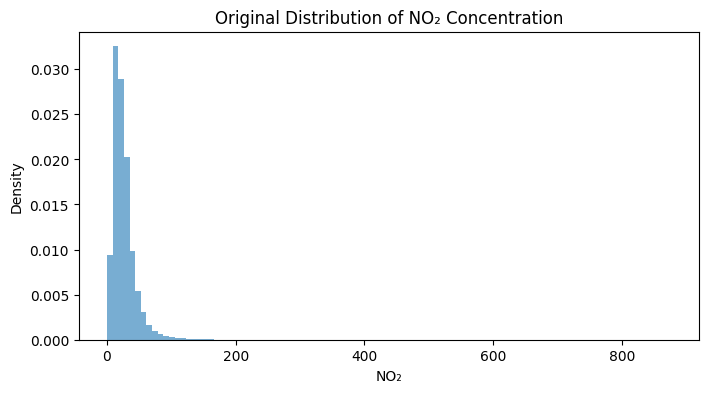

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(x, bins=100, density=True, alpha=0.6)
plt.title("Original Distribution of NO₂ Concentration")
plt.xlabel("NO₂")
plt.ylabel("Density")
plt.show()


Roll No. Based Transformation :

In [ ]:
r = 102303877
a_r = 0.05*(r%7)
b_r = 0.3*((r%5) + 1)
a_r, b_r



(0.2, 0.8999999999999999)

applying the transformation

In [ ]:
z = x + a_r*np.sin(b_r*x)


distribution after the transformation

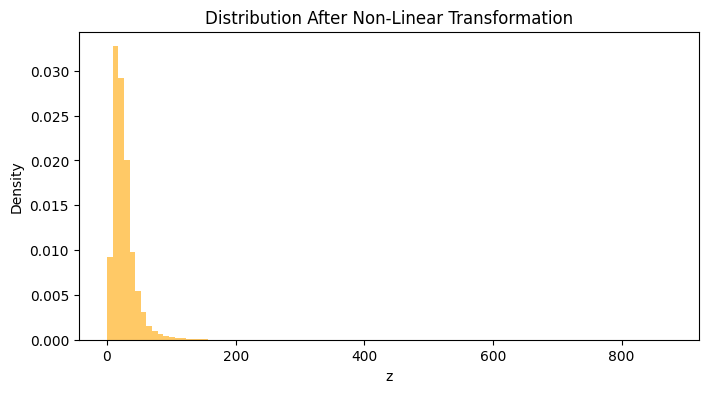

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(z, bins=100, density=True, alpha=0.6, color="orange")
plt.title("Distribution After Non-Linear Transformation")
plt.xlabel("z")
plt.ylabel("Density")
plt.show()


In [ ]:
mu = np.mean(z)
variance = np.var(z)

lambda_param = 1/(2*variance)
c_param = np.sqrt(lambda_param/np.pi)

mu, lambda_param, c_param


(np.float64(25.804091267939096),
 0.0014593812811427918,
 np.float64(0.02155308538236038))

visual validation :

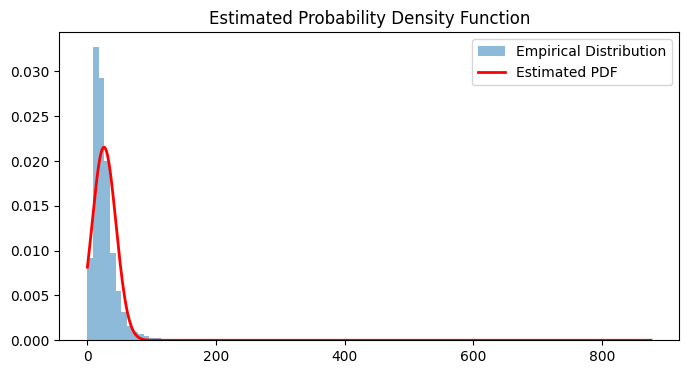

In [ ]:
z_range = np.linspace(z.min(), z.max(), 500)
pdf_estimated = c_param*np.exp(-lambda_param*(z_range-mu)**2)

plt.figure(figsize=(8,4))
plt.hist(z, bins=100, density=True, alpha=0.5, label="Empirical Distribution")
plt.plot(z_range, pdf_estimated, 'r', linewidth=2, label="Estimated PDF")
plt.legend()
plt.title("Estimated Probability Density Function")
plt.show()


final submission values :

In [ ]:
print("μ(mu):", mu)
print("λ(lambda):", lambda_param)
print("c:", c_param)


μ(mu): 25.804091267939096
λ(lambda): 0.0014593812811427918
c: 0.02155308538236038
